# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, norm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms-hospital-readmissions.csv')

****
## Preliminary Analysis

In [3]:
# suppress Pandas warning in the following cell
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# deal with missing and inconvenient portions of data
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

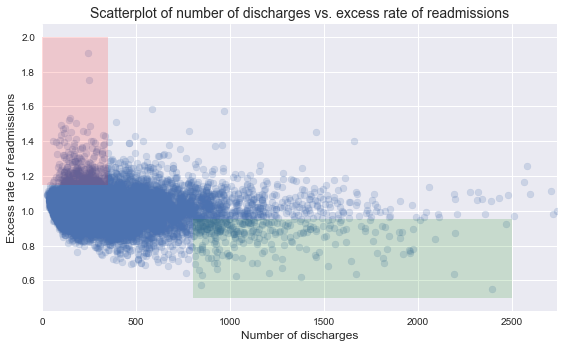

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha=0.15, interpolate=True)
ax.fill_between([800,2500], 0.5, 0.95, facecolor='green', alpha=0.15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [6]:
# Your turn
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


First let's turn the Python lists into numpy arrays.

In [7]:
x = np.fromiter(x, dtype=int)
y = np.fromiter(y, dtype=float)

Then we create groups of low and high number of discharges.

In [8]:
low = y[x<100]
high = y[x>1000]

The stats given above for hospitals with number of discharges < 100 are consistent with the data.

In [9]:
print low.mean()
print 1.0 * sum(low>1) / len(low)

1.02261835017
0.632154882155


The stats given above for hospitals with number of discharges > 1000 are consistent with the data.

In [10]:
print high.mean()
print 1.0 * sum(high>1) / len(high)

0.979073043478
0.445652173913


There is a negative correlation between the number of discharges and readmission rate, though the effect is minimal.

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print slope

-2.85650529438e-05


Hospitals in the sample with low discharge numbers have readmission rates 0.044 higher on average than hospitals with high discharge numbers.

In [12]:
diff = low.mean() - high.mean()
print diff

0.0435453066901


Our null hypothesis is that the number of discharges does not affect the readmission rate. In this case, the difference of the mean readmission rates between the two groups is zero in the population. Our alternative hypothesis is that having a high number of discharges decreases the readmission rate. This means we perform a one-sided test. In the event we were investigating if there was any difference, we would have performed a two-sided test. First we calculate the standard deviation by adding the variance of the two groups.

In [13]:
sigma = np.sqrt(high.var()/len(high) + low.var()/len(low))
print sigma

0.00580774624552


This yields a z-score of nearly 7.5, which will have a very low probability of occurring by chance. For comparison, using 1% as the accepted probability of a type 1 error corresponds to a z-score of only 2.3.

In [14]:
z = diff / sigma
print 'Observed z-score: %f' % z
print 'Critical z-score: %f' % norm.ppf(0.99)

Observed z-score: 7.497798
Critical z-score: 2.326348


The probability of the observed difference occurring by chance assuming the null hypothesis is near zero, so we reject the null hypothesis that the difference between the mean readmission rates of the two groups is zero in the population.

In [15]:
print norm.sf(z)

3.2449468137e-14


Now that we assume the alternative hypothesis that groups with high discharge numbers have lower readmission rates, we are confident there is a 99% probability that the decrease in mean readmission rate for hospitals in the population with high discharge numbers is between 0.029 and 0.059.

In [16]:
print norm.interval(0.99, loc=diff, scale=sigma)

(0.028585543723290953, 0.058505069656887586)


A more informative plot than a scatter plot may be the KDE plot show below. It shows that readmission rate is very normally distributed, while the number of discharges is highly skewed.

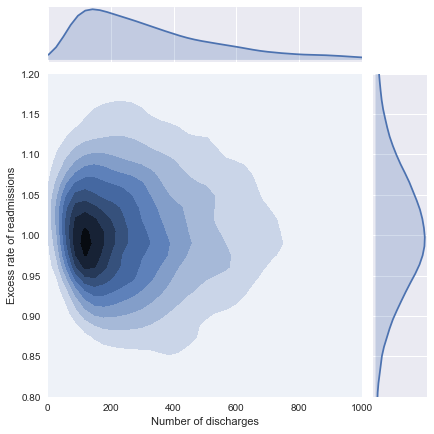

In [17]:
ax = sns.jointplot(x, y, kind='kde', stat_func=None, xlim=(0, 1000), ylim=(0.8, 1.2))
ax.set_axis_labels(xlabel='Number of discharges', ylabel='Excess rate of readmissions')
plt.show()

We can take the log of the number of discharges to make the data more normally distributed.

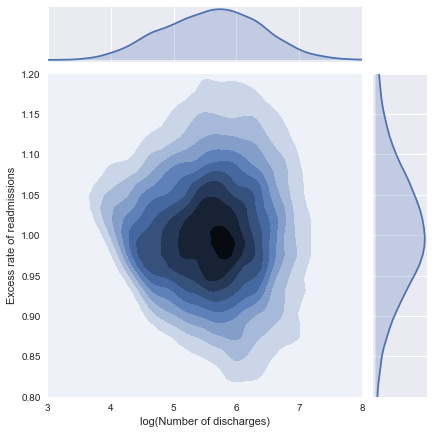

In [18]:
ax = sns.jointplot(np.log(x), y, kind='kde', stat_func=None, xlim=(3, 8), ylim=(0.8, 1.2))
ax.set_axis_labels(xlabel='log(Number of discharges)', ylabel='Excess rate of readmissions')
plt.show()

One could also make scatterplots of the two groups individually. The low discharge group exhibits a negative correlation between readmission rate and the number of discharges, but the spread also increases.

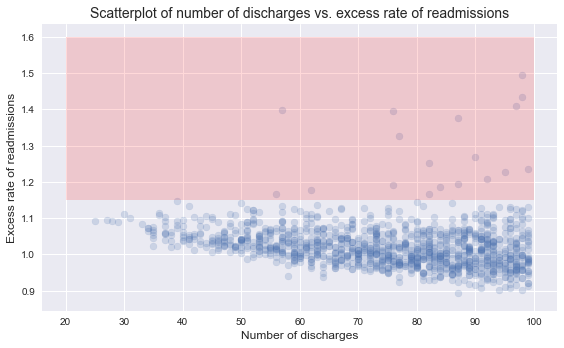

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x[x<100], low, alpha=0.2)
ax.fill_between([20,100], 1.15, 1.6, facecolor='red', alpha=0.15, interpolate=True)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The high discharge group shows no discernible trend between number of discharges and readmission rate.

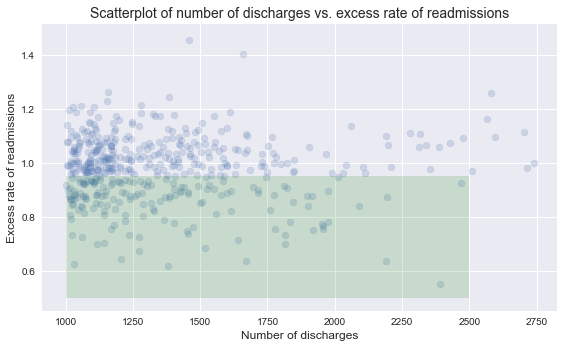

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x[x>1000], high, alpha=0.2)
ax.fill_between([1000,2500], 0.5, 0.95, facecolor='green', alpha=0.15, interpolate=True)

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()